In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats




In [9]:
df = pd.read_csv("downloads/house_price.csv")


In [10]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [12]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [13]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [14]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [16]:
df.shape

(13200, 7)

#FINDING OUTLIERS USING MEAN METHOD

In [22]:
mean=df['price_per_sqft'].mean()

In [18]:
std=df['price_per_sqft'].std()

In [19]:
mean

7920.336742424242

In [20]:
std

106727.16032810845

In [24]:
lower=mean - 3*std

In [25]:
upper=mean+3*std

In [26]:
lower

-312261.1442419011

In [27]:
upper

328101.8177267496

In [29]:
trimmedstdmean=df[(df['price_per_sqft']>=lower) & (df['price_per_sqft']<=upper)]

In [30]:
trimmedstdmean

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


#percentile method to find outliers

In [32]:
lower=df['price_per_sqft'].quantile(0.05)
upper=df['price_per_sqft'].quantile(0.95)

In [33]:
lower

3107.8500000000004

In [34]:
upper

15312.099999999984

In [36]:
trimmedpercentile=df[(df['price_per_sqft']>=lower) & (df['price_per_sqft']<=upper)]

In [37]:
trimmedpercentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [38]:
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
IQR=Q3-Q1

In [39]:
IQR

3050.0

In [40]:
lower=Q1-1.5*IQR
upper=Q3-1.5*IQR

In [41]:
lower

-308.0

In [42]:
upper

2742.0

In [43]:
df_trimmed_iqr = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]

In [44]:
df_trimmed_iqr

,location,size,total_sqft,bath,price,bhk,price_per_sqft
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500
99,Chandapura,2 BHK,650.0,1.0,17.00,2,2615
130,Electronic City,2 BHK,880.0,1.0,16.50,2,1875
169,Attibele,1 BHK,450.0,1.0,11.00,1,2444
237,Chandapura,1 BHK,645.0,1.0,16.45,1,2550
...,...,...,...,...,...,...,...
12897,Kammasandra,3 BHK,1616.0,3.0,40.00,3,2475
12909,Bommasandra,2 BHK,950.0,2.0,25.00,2,2631
13019,Electronic City,2 BHK,750.0,2.0,19.50,2,2600
13028,Chandapura,3 BHK,1095.0,2.0,28.00,3,2557


#z-score method

In [45]:
z_scores = stats.zscore(df['price_per_sqft'])

In [46]:
z_scores

0       -0.039554
1       -0.030971
2       -0.033876
3       -0.015698
4       -0.034391
           ...   
13195   -0.011538
13196    0.029897
13197   -0.024946
13198    0.023300
13199   -0.045260
Name: price_per_sqft, Length: 13200, dtype: float64

In [47]:
df_trimmed_zscore= df[(np.abs(z_scores) < 3)]

In [48]:
df_trimmed_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


#boxplot

C:\Users\abhin\AppData\Local\Temp\ipykernel_23208\29442484.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


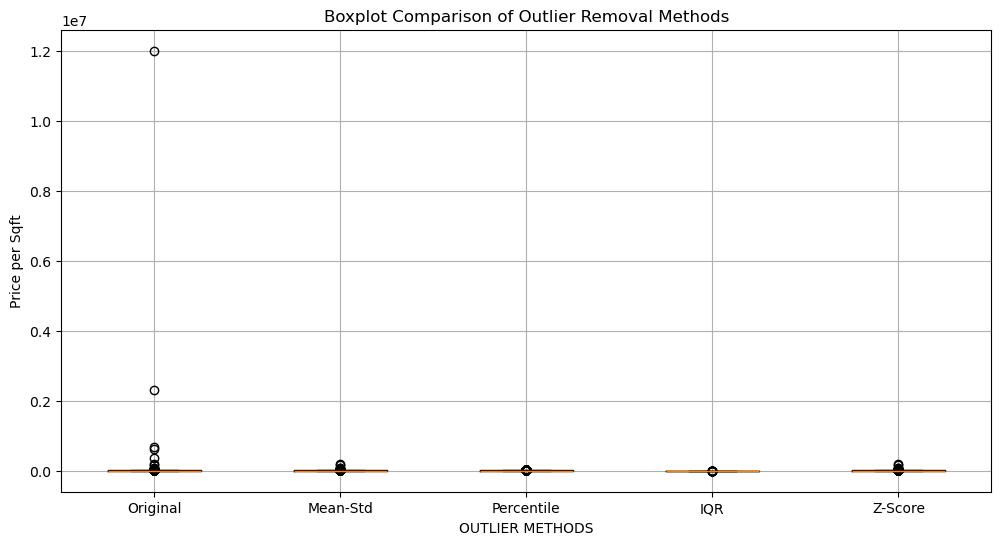

In [51]:


plt.figure(figsize=(12,6))

# Plot all in one boxplot
data = [
    df['price_per_sqft'],                      # Original
    trimmedstdmean['price_per_sqft'],          # Mean & std method
    trimmedpercentile['price_per_sqft'],   # Percentile method
    df_trimmed_iqr['price_per_sqft'],          # IQR method
    df_trimmed_zscore['price_per_sqft'],            # Z-score method
]

labels = ['Original', 'Mean-Std', 'Percentile', 'IQR', 'Z-Score']

plt.boxplot(data, labels=labels)
plt.title("Boxplot Comparison of Outlier Removal Methods")
plt.ylabel("Price per Sqft")
plt.xlabel('OUTLIER METHODS')
plt.grid(True)
plt.show()


#histplot


<Axes: xlabel='price_per_sqft', ylabel='Count'>

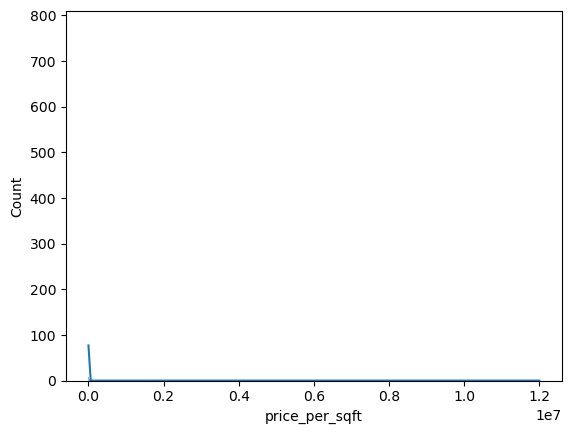

In [52]:
sns.histplot(df['price_per_sqft'],kde=True)

In [54]:
from scipy.stats import skew, kurtosis
print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))


Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


<Axes: xlabel='price_log', ylabel='Count'>

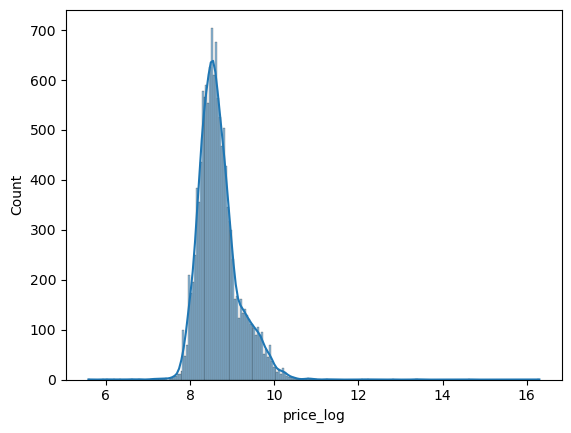

In [57]:
#Try log transformation
import numpy as np
df['price_log'] = np.log(df['price_per_sqft'])

sns.histplot(df['price_log'], kde=True)


In [56]:
print("Skewness:", skew(df['price_log']))
print("Kurtosis:", kurtosis(df['price_log']))


Skewness: 1.3997035748119977
Kurtosis: 9.199636085376468


#correlation and heatmap

In [58]:
correlation = df.corr(numeric_only=True)
print(correlation)


                total_sqft      bath     price       bhk  price_per_sqft  \
total_sqft        1.000000  0.392743  0.574330  0.346013       -0.008267   
bath              0.392743  1.000000  0.455998  0.897951        0.030883   
price             0.574330  0.455998  1.000000  0.396883        0.028387   
bhk               0.346013  0.897951  0.396883  1.000000        0.030955   
price_per_sqft   -0.008267  0.030883  0.028387  0.030955        1.000000   
price_log         0.106368  0.432538  0.585517  0.411460        0.201116   

                price_log  
total_sqft       0.106368  
bath             0.432538  
price            0.585517  
bhk              0.411460  
price_per_sqft   0.201116  
price_log        1.000000  


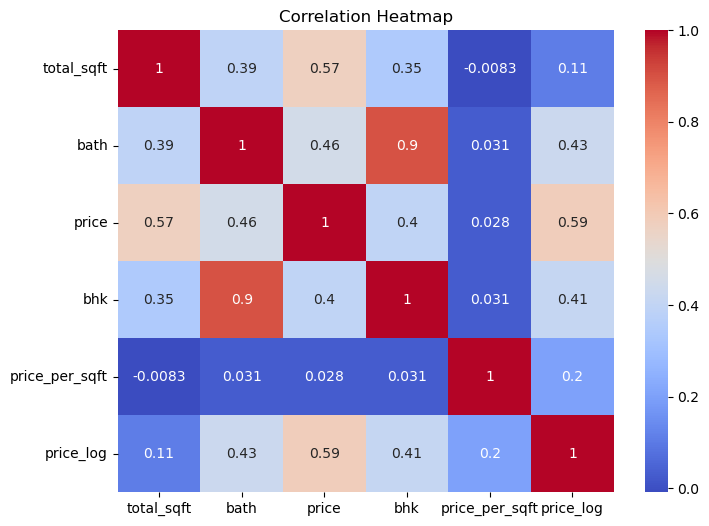

In [59]:

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


"From the heatmap, 
total_sqft and price show a strong positive correlation (0.85),
which means larger houses tend to cost more. 
The number of bathrooms also shows some positive relation with price per square foot."

#scatter plot

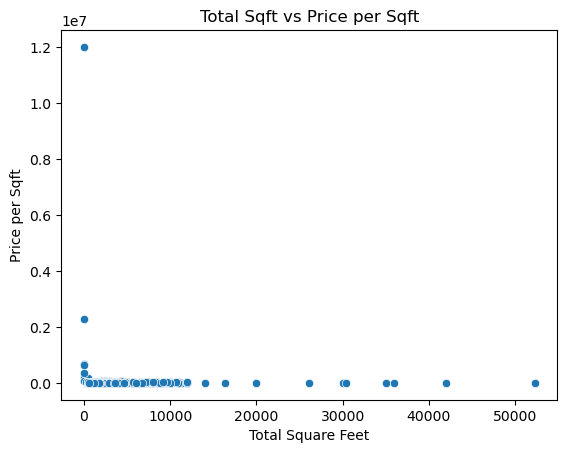

In [60]:
sns.scatterplot(x='total_sqft', y='price_per_sqft', data=df)
plt.title("Total Sqft vs Price per Sqft")
plt.xlabel("Total Square Feet")
plt.ylabel("Price per Sqft")
plt.show()


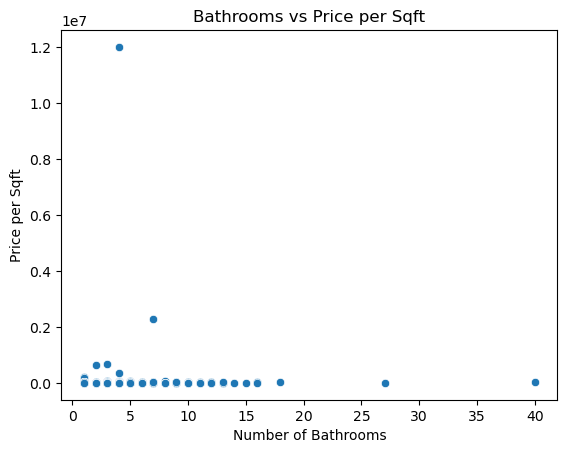

In [61]:
sns.scatterplot(x='bath', y='price_per_sqft', data=df)
plt.title("Bathrooms vs Price per Sqft")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price per Sqft")
plt.show()


“The scatter plot between total_sqft and price_per_sqft shows a loose positive trend, suggesting that larger properties tend to have slightly higher price per square foot. However, the data is quite spread out, so the correlation is not very strong.